In [1]:
import pandas as pd

messages = pd.read_csv('/Users/Naman/Downloads/SMSSpamCollection', sep='\t',
                           names=["label", "message"])

import re
import nltk


from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
messages.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [3]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


nltk.download('stopwords')

ps = PorterStemmer()
w = WordNetLemmatizer()
corpus = []

for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Naman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values
y

array([False, False,  True, ..., False, False, False])

In [5]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

from sklearn.naive_bayes import MultinomialNB
mv=MultinomialNB();
spam_detect_model = mv.fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

In [6]:
y_pred

array([False,  True, False, ..., False,  True, False])

In [7]:
from sklearn.metrics import confusion_matrix
!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix


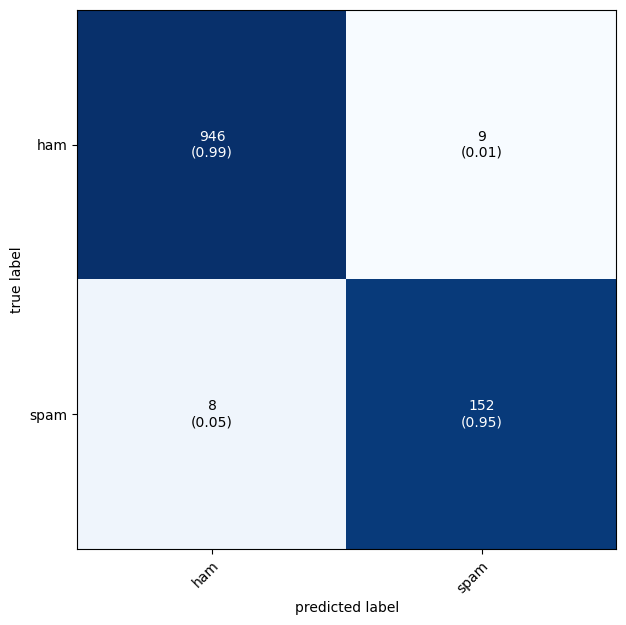

In [8]:

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["ham","spam"],
                      show_normed = True);

In [9]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9847533632286996